Data Categories:

0. Daisy
1. Dandelion
2. Rose
3. Sunflower
4. Tulip

In [213]:
from aitk.utils import gallery, array_to_image
from aitk.networks import Network

import os
import cv2
import numpy as np
import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

GATHER DATA

In [214]:
#collect images in a list
def oneFlower(name):
    path = '/scratch/dhawkin1/flowers/flowers/' + name
    pretty = []
    for pic in os.listdir(path):
        image = cv2.imread(os.path.join(path, pic))
        imageSize = cv2.resize(image, dsize=(56, 56), interpolation=cv2.INTER_CUBIC)
        rgb_image = cv2.cvtColor(imageSize, cv2.COLOR_BGR2RGB)
        pretty.append(rgb_image)
    pretty = np.array(pretty)
    random.shuffle(pretty)
    cutoff = int(len(pretty)*0.8)
    train = pretty[:cutoff] 
    test = pretty[cutoff:] 
    return train, test

In [215]:
#get data
daisy_pics, daisy_test = oneFlower("daisy")
dandelion_pics, dand_test = oneFlower("dandelion")
rose_pics, rose_test = oneFlower("rose")
sunflower_pics, sun_test = oneFlower("sunflower")
tulip_pics, tulip_test = oneFlower("tulip")

In [216]:
#combine the test sets
all_test_x = []
all_test_y = []
for img in daisy_test:
    all_test_x.append(img)
    all_test_y.append(0)
for img in sun_test:
    all_test_x.append(img)
    all_test_y.append(3)
for img in tulip_test:
    all_test_x.append(img)
    all_test_y.append(4)
for img in dand_test:
    all_test_x.append(img)
    all_test_y.append(1)
for img in rose_test:
    all_test_x.append(img)
    all_test_y.append(2)

all_test_x = np.array(all_test_x)
all_test_y = np.array(all_test_y)


#combine all of the training sets
all_train_x = []
all_train_y = []
for img in daisy_pics:
    all_train_x.append(img)
    all_train_y.append(0)
for img in dandelion_pics:
    all_train_x.append(img)
    all_train_y.append(1)
for img in rose_pics:
    all_train_x.append(img)
    all_train_y.append(2)
for img in sunflower_pics:
    all_train_x.append(img)
    all_train_y.append(3)
for img in tulip_pics:
    all_train_x.append(img)
    all_train_y.append(4)

all_train_x = np.array(all_train_x)
all_train_y = np.array(all_train_y)

In [217]:
#shuffle? let's see
#confirmed, they shuffle properly
shuffleTrain = np.random.permutation(len(all_train_x))
shuffleTest = np.random.permutation(len(all_test_x))


shuffle_test_x = all_test_x[shuffleTest]
shuffle_test_y = all_test_y[shuffleTest]

shuffle_train_x = all_train_x[shuffleTrain]
shuffle_train_y = all_train_y[shuffleTrain]


0,4,3,3,1
0,4,3,0,0
1,2,1,2,1
0,4,0,0,0

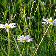
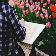
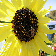
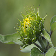
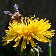
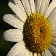
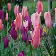
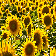
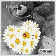
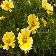
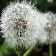
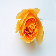
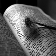
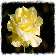
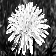
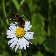
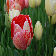
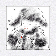
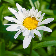
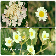

In [218]:
#just checking that it's actually there :D

print("dimensions: ", all_test_x.shape)

gallery(shuffle_test_x, gallery_shape = (5,4), labels = shuffle_test_y[:20]) #I want them smaller

In [219]:
print("ranges")
print("TRAINING: ", shuffle_train_x.max(), shuffle_train_x.min())
print("ALL TEST: ", shuffle_test_x.max(), shuffle_test_x.min())

ranges
TRAINING:  255 0
ALL TEST:  255 0


In [220]:
#normalizin
norm_train_x = shuffle_train_x/255
norm_test_x = shuffle_test_x/255

0,4,4,1,4
3,2,3,3,3
4,3,3,0,4
1,2,4,4,4

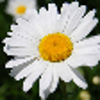
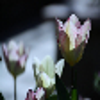
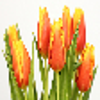
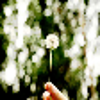
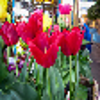
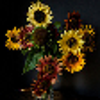
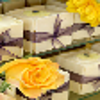
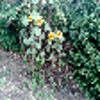
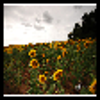
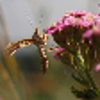
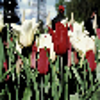
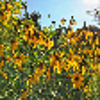
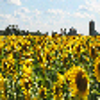
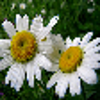
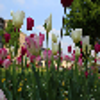
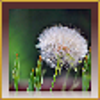
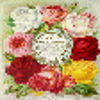
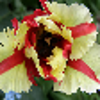
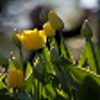
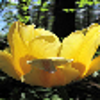

In [221]:
#wanted to see the difference
temp = [array_to_image(norm_train_x[i]) for i in range(20)]
big = [img.resize((100,100)) for img in temp]
gallery(big, gallery_shape = (5,4), labels=shuffle_train_y[:20])

In [222]:
size_train = len(norm_train_x)
size_test = len(norm_test_x)
print("size train: ", size_train, "size test: ", size_test)
print("dimensions: ", norm_train_x.shape, "dimensions test: ", norm_test_x.shape)

size train:  3452 size test:  865
dimensions:  (3452, 56, 56, 3) dimensions test:  (865, 56, 56, 3)


In [223]:
#TARGET DATA WOO WOOOOO
num_cat = len(set(shuffle_train_y))

train_y_cat = to_categorical(shuffle_train_y, num_classes=num_cat)
test_y_cat = to_categorical(shuffle_test_y, num_classes=num_cat)

train_y_cat[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [224]:
#reminder of what our vars are:
    #training set:
        #images in norm_train_x
        #categories in train_y_cat
    #test set:
        #images in norm_test_x
        #categories in test_y_cat

In [225]:
#model network woooooooo
#temporarily just our fashion network for fun
neural_net = Sequential()
neural_net.add(Conv2D(30,(4,4),name="conv1", activation="relu",input_shape=(56,56,3)))
neural_net.add(MaxPooling2D(pool_size=(3,3),name="pool1"))
neural_net.add(Conv2D(40,(8,8),name="conv2", activation="relu",padding = 'same'))
neural_net.add(Dropout(.2))
neural_net.add(Conv2D(40,(10,10),name="conv3", activation="relu",padding = 'same'))
neural_net.add(MaxPooling2D(pool_size=(3,3),name="pool2"))
neural_net.add(Conv2D(20,(20,20),name="conv4", activation="relu",padding = 'same'))
neural_net.add(Dropout(.25))
neural_net.add(Conv2D(20,(30,30),name="conv5", activation="relu",padding = 'same'))
neural_net.add(Flatten(name="flatten"))
neural_net.add(Dense(20, name="output1", activation='relu'))
neural_net.add(Dropout(.3))
neural_net.add(Dense(20, name="output2", activation='relu'))
neural_net.add(Dropout(.1))
neural_net.add(Dense(5, name="output", activation='softmax'))
neural_net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 53, 53, 30)        1470      
                                                                 
 pool1 (MaxPooling2D)        (None, 17, 17, 30)        0         
                                                                 
 conv2 (Conv2D)              (None, 17, 17, 40)        76840     
                                                                 
 dropout_16 (Dropout)        (None, 17, 17, 40)        0         
                                                                 
 conv3 (Conv2D)              (None, 17, 17, 40)        160040    
                                                                 
 pool2 (MaxPooling2D)        (None, 5, 5, 40)          0         
                                                                 
 conv4 (Conv2D)              (None, 5, 5, 20)         

In [226]:
#compileeeeeee
neural_net.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [227]:
net = Network(neural_net)

print("sizing compat: ", (norm_train_x.shape), (train_y_cat.shape), (norm_test_x.shape), (test_y_cat.shape))

sizing compat:  (3452, 56, 56, 3) (3452, 5) (865, 56, 56, 3) (865, 5)



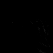
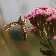

In [228]:
from time import sleep
for i in range(10):
    net.propagate(norm_train_x[i])
    net.display(norm_train_x[i])
    sleep(4.0)

In [ ]:
#visualllllllllll
history = net.fit(norm_train_x, 
                  train_y_cat, 
                  verbose=1,
                  validation_data=(norm_test_x, 
                                   test_y_cat),
                  epochs=150
                 )

In [ ]:
#let's see

In [ ]:
test_image = 22 # change this to see a different image 

In [ ]:
from math import ceil
for layer in ["conv1", "pool1"]:
    data = [net.propagate_to(norm_test_x[test_image], layer, channel=channel)
            for channel in range(8)]
    largest = max([sublist.max() for sublist in data])
    net.set_config_layer(layer, colormap=("gray", 0, ceil(largest)))

In [ ]:
images = [net.propagate_to(norm_test_x[test_image], "conv1", "image", channel=channel)
         for channel in range(8)]
original = norm_test_x[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
images = [net.propagate_to(norm_test_x[test_image], "pool1", "image", channel=channel)
         for channel in range(8)]
original = norm_test_x[test_image]
bigger = [image.resize((200,200),resample=0) for image in images]
gallery([original] + bigger, labels="channel{index}", gallery_shape=(9,1))

In [ ]:
#results examination

In [ ]:
#results results results
from numpy import argmax
outputs = net.predict(norm_test_x)
answers = [argmax(output) for output in outputs]
targets = [argmax(target) for target in test_y_cat]

In [ ]:
incorrect = [i for i in range(len(answers)) if answers[i] != targets[i]]
len(incorrect)

In [ ]:
missed_target = [targets[i] for i in incorrect]
wrong_answer = [answers[i] for i in incorrect]

In [ ]:
from collections import Counter

In [ ]:
t_ctr = Counter(missed_target)
t_ctr.most_common()
a_ctr = Counter(wrong_answer)
a_ctr.most_common()

In [ ]:
images = [array_to_image(norm_test_x[index]) for index in incorrect]
label = [str(missed_target[i]) + "," + str(wrong_answer[i]) for i in range(len(wrong_answer))]
gallery(images, labels=label)

Data Categories:

0. Daisy
1. Dandelion
2. Rose
3. Sunflower
4. Tulip

So, we take into account when 2 and 4 are mixed up, and when 0 and 1 are mixed up

In [ ]:
count01 = 0
count02 = 0
count03 = 0
count04 = 0 
count12 = 0
count13 = 0
count14 = 0
count23 = 0 
count24 = 0
count34 = 0 
for i in range(len(wrong_answer)):
    if ((wrong_answer[i] == 0 and missed_target[i] == 1) or (wrong_answer[i] == 1 and missed_target[i] == 0)):
        count01+=1
    elif((wrong_answer[i] == 0 and missed_target[i] == 2) or (wrong_answer[i] == 2 and missed_target[i] == 0)):
        count02+=1
    elif((wrong_answer[i] == 0 and missed_target[i] == 3) or (wrong_answer[i] == 3 and missed_target[i] == 0)):
        count03+=1
    elif((wrong_answer[i] == 0 and missed_target[i] == 4) or (wrong_answer[i] == 4 and missed_target[i] == 0)):
        count04+=1
    elif((wrong_answer[i] == 1 and missed_target[i] == 2) or (wrong_answer[i] == 2 and missed_target[i] == 1)):
        count12+=1
    elif((wrong_answer[i] == 1 and missed_target[i] == 3) or (wrong_answer[i] == 3 and missed_target[i] == 1)):
        count13+=1
    elif((wrong_answer[i] == 1 and missed_target[i] == 4) or (wrong_answer[i] == 4 and missed_target[i] == 1)):
        count14+=1
    elif((wrong_answer[i] == 2 and missed_target[i] == 3) or (wrong_answer[i] == 3 and missed_target[i] == 2)):
        count23+=1
    elif((wrong_answer[i] == 2 and missed_target[i] == 4) or (wrong_answer[i] == 4 and missed_target[i] == 2)):
        count24+=1
    elif((wrong_answer[i] == 3 and missed_target[i] == 4) or (wrong_answer[i] == 4 and missed_target[i] == 3)):
        count34+=1
print("Out of ", len(wrong_answer), " wrong answers, ", count01, " were Daisy/Dandelion confusion and ", count24, " were Rose/Tulip confusion")
print(count01/len(wrong_answer)*100,"% daisy/dandelion error", 
    count02/len(wrong_answer)*100,"% daisy/rose error",
    count03/len(wrong_answer)*100,"% daisy/sunflower error",
    count04/len(wrong_answer)*100,"% daisy/tulip error",
    count12/len(wrong_answer)*100,"% dandelion/rose error",
    count13/len(wrong_answer)*100,"% dandelion/sunflower error",
    count14/len(wrong_answer)*100,"% dandelion/tulip error",
    count23/len(wrong_answer)*100,"% rose/sunflowererror",
    count24/len(wrong_answer)*100,"% rose/tulip error",
    count34/len(wrong_answer)*100,"% sunflower/tulip error")